In [84]:
___Author___='LumberJack Jyss'


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
import talib

In [86]:
package_dir = os.path.dirname(os.path.abspath('Predict_LSTM.ipynb'))
#LeChemin = '/'+package_dir+'/20191211 BACKTEST/'
LeChemin = ''
list_dir = os.listdir(LeChemin+'DL_2019-12-06/.')

In [87]:
package_dir,LeChemin

('/Users/YTsBaCh/Documents/DATA SCIENCES/20191211 BACKTEST', '')

In [88]:
LaBase = pd.read_csv(LeChemin+'LaBase_09.csv')
LaBase.index = pd.to_datetime(LaBase['Date'],format='%Y-%m-%d')
LaBase = LaBase.drop(['Date'],axis=1)
LaBase.iloc[:,1:] = LaBase.iloc[:,1:].astype(float)
LaBase.head()

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-12-07,A,41.099998,40.540001,40.919998,40.700001,2004500.0,39.174011
2015-12-08,A,41.279999,40.419998,40.610001,41.169998,4331800.0,39.626396
2015-12-09,A,41.799999,40.910000,41.250000,40.980000,4133300.0,39.443512
2015-12-10,A,41.660000,40.650002,40.959999,41.250000,3709200.0,39.703396
2015-12-11,A,40.750000,40.060001,40.750000,40.189999,2634400.0,38.683136


In [89]:
df = LaBase[LaBase['Symbol']=='AMZN']
df = df.drop(['Symbol'],axis=1)

In [90]:
%%time
print('Preparing data...')
df['Momentum']  = df['Volume'] * (df['Open'] - df['Close'])
df['Avg_price'] = (df['Low'] + df['High'])/2
df['Range']     = df['High'] - df['Low']
df['Ohlc_price'] = (df['Low'] + df['High'] + df['Open'] + df['Close'])/4
df['Oc_diff']    = df['Open'] - df['Close']
rsi = talib.RSI(df['Close'],timeperiod=14)
stoc_slowk, stoc_slowd = talib.STOCH(df['High'],df['Low'],df['Close'])
upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(df['Close'],timeperiod=5)
sma8 = talib.SMA(df['Close'],timeperiod=8)
sma10 = talib.SMA(df['Close'],timeperiod=10)
sma12 = talib.SMA(df['Close'],timeperiod=12)
sma15 = talib.SMA(df['Close'],timeperiod=15)
sma30 = talib.SMA(df['Close'],timeperiod=30)
sma35 = talib.SMA(df['Close'],timeperiod=35)
sma40 = talib.SMA(df['Close'],timeperiod=40)
sma45 = talib.SMA(df['Close'],timeperiod=45)
sma50 = talib.SMA(df['Close'],timeperiod=50)
atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=10)
delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50
bbdelta = upper - middle
price_bolup = df['Close'] - lower
price_bolow = df['Close'] - upper
Ema = talib.EMA(df['Close'],timeperiod=20)
KC_High = Ema + 2*atr
KC_Low = Ema - 2*atr
aroondown, aroonup = talib.AROON(df['High'], df['Low'], timeperiod=9)
aroon = aroonup - aroondown #(aroonup-aroondown)/abs((aroonup-aroondown))
rsi30_list = []
rsi70_list = []
for i in range(0,df.shape[0]):
    rsi70_list.append(70 - rsi[i])
    rsi30_list.append(rsi[i] - 30)
    #except:
        #   rsi70_list.append(0)
        #  rs30_list.append(0)
varop_spy = df['Open'] - df['Close']
varhl_spy = df['High'] - df['Low']
df['Varop_Spy'] = varop_spy
df['Varhl_spy'] = varhl_spy
df['RSI'] = rsi
df['70 - RSI'] = np.array(rsi70_list)
df['RSI - 30'] = np.array(rsi30_list)
df['BBD_Delta_Up'] = bbdelta
df['delta5_8'] = delta5_8
df['delta8_10'] = delta8_10
df['delta10_12'] = delta10_12
df['delta12_15'] = delta12_15
df['delta15_30'] = delta15_30
df['delta30_35'] = delta30_35
df['delta35_40'] = delta35_40
df['delta40_45'] = delta40_45
df['delta45_50'] = delta45_50
df['Stoc_Slowk'] = stoc_slowk
df['Stoc_Slowd'] = stoc_slowd
df['KC_High'] = KC_High
df['KC_Low'] = KC_Low
df['upper'] = upper
df['lower'] = lower
df['var_bollup_kchigh'] = upper-KC_High
df['var_bolllow_kclow'] = lower-KC_Low
df['Aroon Up'] = aroonup
df['Aroon Down'] = aroondown
df['Delta Aroon'] = aroon
up = []
down = []
df['Volume'] = df['Volume'].shift(-5) - df['Volume']
df['Close.S'] = df['Close'].shift(-5)
df = df.dropna()
df.head()

Preparing data...
CPU times: user 78.5 ms, sys: 2.95 ms, total: 81.4 ms
Wall time: 80.3 ms


In [93]:
df = df.drop((['Close','High','Open','Low','upper','lower','KC_High','KC_Low','Avg_price','Ohlc_price']),axis=1)
df.rename(columns=lambda x: x.replace('Adj Close', 'Close'), inplace=True)
df.head()

,Volume,Close,Momentum,Range,Oc_diff,Varop_Spy,Varhl_spy,RSI,70 - RSI,RSI - 30,...,delta40_45,delta45_50,Stoc_Slowk,Stoc_Slowd,var_bollup_kchigh,var_bolllow_kclow,Aroon Up,Aroon Down,Delta Aroon,Close.S
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-18,-209500.0,525.000000,7.665966e+07,17.470032,16.190002,16.190002,17.470032,41.788263,28.211737,11.788263,...,-8.500862,-6.546890,86.239289,83.072830,-49.224086,-21.814817,100.000000,33.333333,66.666667,555.150024
2016-02-19,-97700.0,534.900024,-7.059101e+07,20.600037,-14.190002,-14.190002,20.600037,44.797066,25.202934,14.797066,...,-9.007557,-6.581844,83.164398,85.847856,-39.983954,-22.514419,88.888889,22.222222,66.666667,555.229980
2016-02-22,-1421200.0,559.500000,-9.630211e+07,19.570007,-17.299988,-17.299988,19.570007,51.504655,18.495345,21.504655,...,-9.395697,-6.428355,84.488619,84.630769,-26.559924,-23.619029,100.000000,11.111111,88.888889,552.520020
2016-02-23,987700.0,552.940002,1.057253e+07,11.579956,2.609985,2.609985,11.579956,49.768021,20.231979,19.768021,...,-9.435141,-6.920912,88.255885,85.302967,-20.628254,-15.761700,88.888889,0.000000,88.888889,579.039978
2016-02-24,-1649500.0,554.039978,-5.166066e+07,21.119995,-8.289978,-8.289978,21.119995,50.072018,19.927982,20.072018,...,-9.562557,-7.346646,88.680312,87.141605,-18.935091,-5.313178,77.777778,11.111111,66.666667,580.210022


In [94]:
from sklearn.decomposition import PCA
dataset = df.copy()
dataset = dataset.values.astype('float32')
pca_features = list(df)

In [95]:
pca = PCA(n_components=1)
df['PCA'] = pca.fit_transform(dataset)

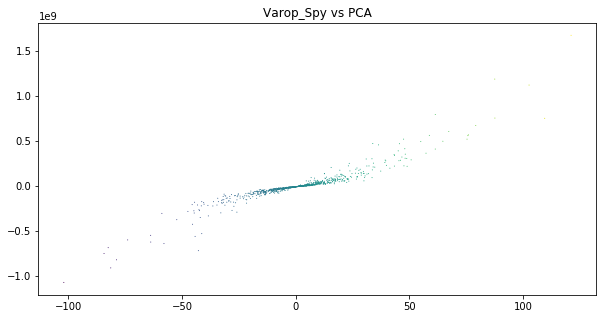

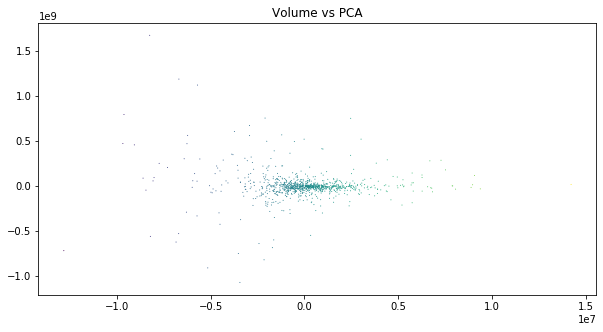

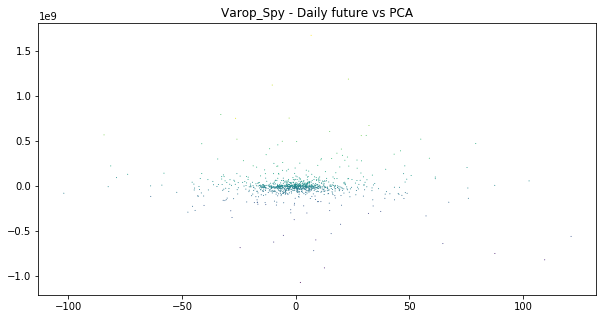

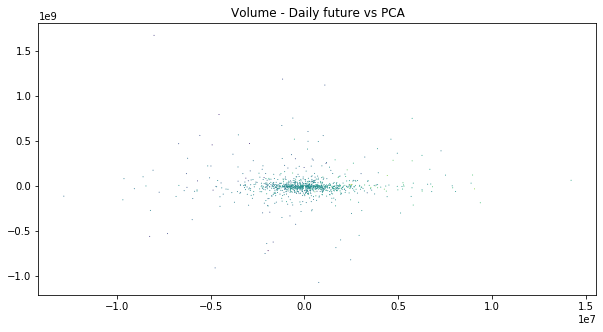

In [97]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import pylab

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Varop_Spy'].values.min(), df['Varop_Spy'].values.max())
color = cm.viridis(norm(df['Varop_Spy'].values))
plt.scatter(df['Varop_Spy'].values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Varop_Spy vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Volume'].values.min(), df['Volume'].values.max())
color = cm.viridis(norm(df['Volume'].values))
plt.scatter(df['Volume'].values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Volume vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Varop_Spy'].values.min(), df['Varop_Spy'].values.max())
color = cm.viridis(norm(df['Varop_Spy'].values))
plt.scatter(df['Varop_Spy'].shift().values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Varop_Spy - Daily future vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Volume'].values.min(), df['Volume'].values.max())
color = cm.viridis(norm(df['Volume'].values))
plt.scatter(df['Volume'].shift().values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Volume - Daily future vs PCA')
plt.show()

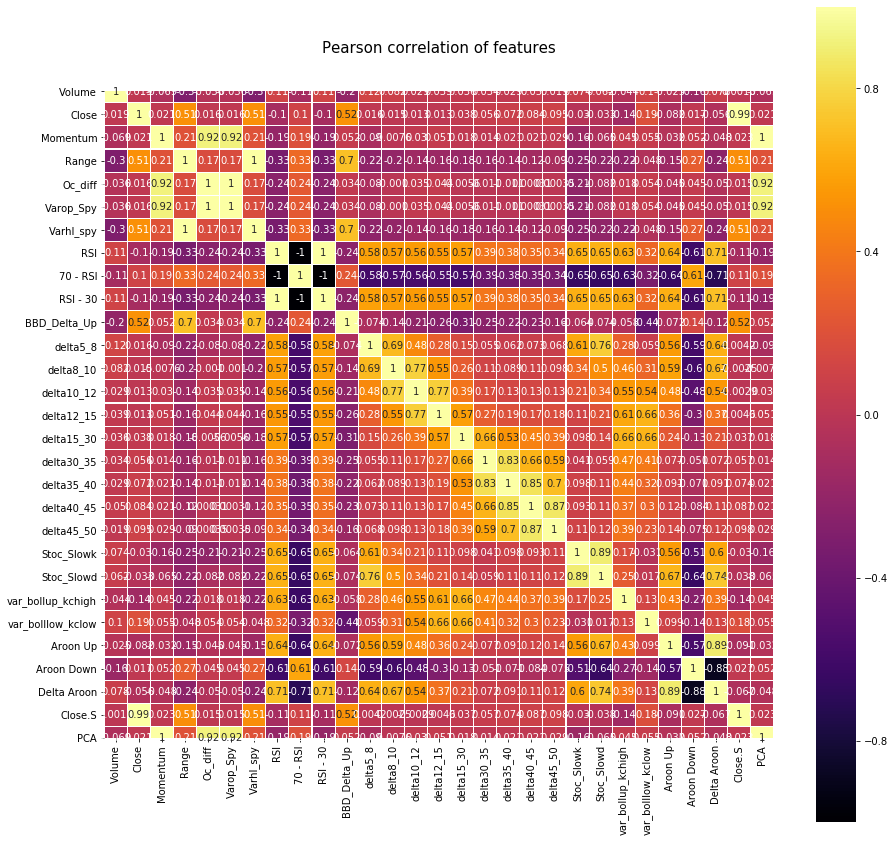

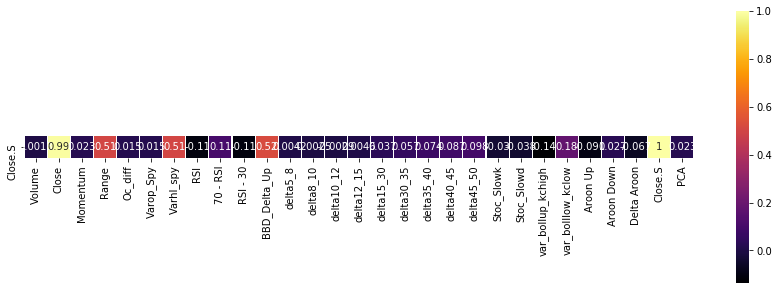

In [98]:
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr[corr.index == 'Close.S'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [99]:
def create_dataset(dataset, look_back=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [100]:
from sklearn.ensemble import RandomForestRegressor

# Scale and create datasets
target_index = df.columns.tolist().index('Close.S')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

X, y = create_dataset(dataset, look_back=1)
y = y[:,target_index]
X = np.reshape(X, (X.shape[0], X.shape[2]))

In [101]:
df.columns.tolist().index('Close.S')

27

In [102]:
forest = RandomForestRegressor(n_estimators = 100)
forest = forest.fit(X, y)

Feature ranking:
0. Close.S 27 (0.547021)
1. Close 1 (0.450351)
2. delta40_45 18 (0.000245)
3. delta12_15 14 (0.000214)
4. delta45_50 19 (0.000212)
5. var_bollup_kchigh 22 (0.000155)
6. Stoc_Slowd 21 (0.000152)
7. Volume 0 (0.000142)
8. delta30_35 16 (0.000128)
9. delta10_12 13 (0.000117)
10. delta15_30 15 (0.000116)
11. delta8_10 12 (0.000112)
12. delta35_40 17 (0.000103)
13. BBD_Delta_Up 10 (0.000102)
14. Stoc_Slowk 20 (0.000097)
15. delta5_8 11 (0.000076)
16. var_bolllow_kclow 23 (0.000070)
17. PCA 28 (0.000060)
18. Delta Aroon 26 (0.000058)
19. Momentum 2 (0.000057)
20. Varhl_spy 6 (0.000055)
21. Varop_Spy 5 (0.000054)
22. RSI 7 (0.000052)
23. RSI - 30 9 (0.000049)
24. Oc_diff 4 (0.000048)
25. 70 - RSI 8 (0.000044)
26. Range 3 (0.000043)
27. Aroon Down 25 (0.000037)


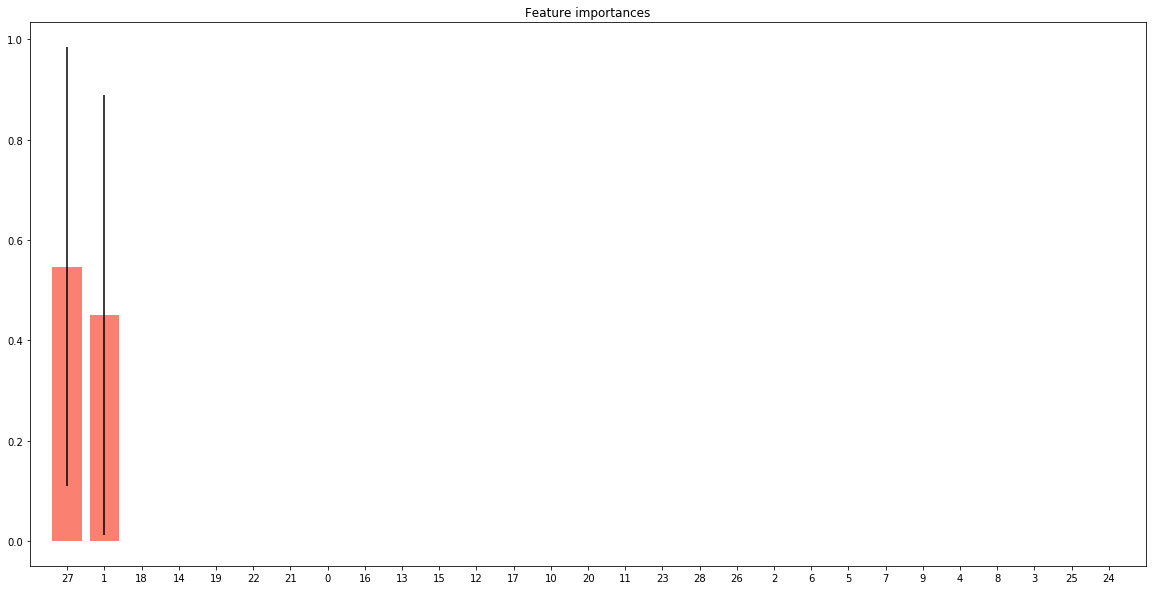

In [103]:
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for forest in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

column_list = df.columns.tolist()
print("Feature ranking:")
for f in range(X.shape[1]-1):
    print("%d. %s %d (%f)" % (f, column_list[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="salmon", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

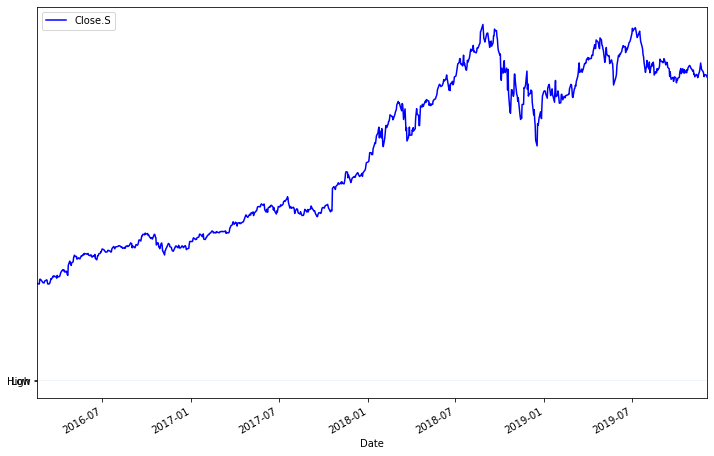

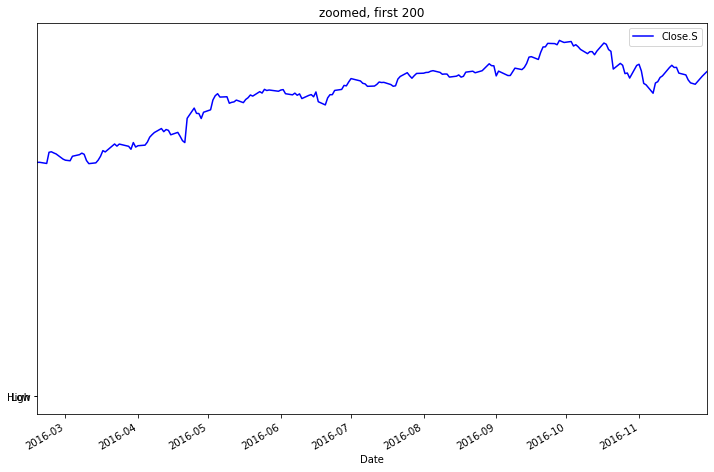

In [106]:
ax = df.plot( y='Close.S', c='b', figsize=(12,8),)
index = [str(item) for item in df.index]
plt.fill_between(x=index, y1='Low',y2='High', data=df, alpha=0.4)
plt.show()

p = df[:200].copy()
ax = p.plot( y='Close.S', c='b', figsize=(12,8))
index = [str(item) for item in p.index]
plt.fill_between(x=index, y1='Low', y2='High', data=p, alpha=0.4)
plt.title('zoomed, first 200')
plt.show()

In [107]:
# Scale and create datasets
target_index = df.columns.tolist().index('Close.S')
#high_index = df.columns.tolist().index('High')
#low_index = df.columns.tolist().index('Low')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Create y_scaler to inverse it later
y_scaler = MinMaxScaler(feature_range=(0, 1))
t_y = df['Close'].values.astype('float32')
t_y = np.reshape(t_y, (-1, 1))
y_scaler = y_scaler.fit(t_y)
    
# Set look_back to 20 which is 5 hours (15min*20)
X, y = create_dataset(dataset, look_back=20)
y = y[:,target_index]

In [108]:
# Set training data size
# We have a large enough dataset. So divid into 98% training / 1%  development / 1% test sets
train_size = int(len(X) * 0.99)
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

In [109]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense

# create a small LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
#model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(5, return_sequences=False))
#model.add(Dense(2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 20, 50)            16000     
_________________________________________________________________
lstm_11 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 5)                 1120      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 37,326
Trainable params: 37,326
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
# Save the best weight during training.
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(LeChemin+"TEST_BOOST/weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint]
history = model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Train on 832 samples, validate on 93 samples
Epoch 1/5
832/832 [==============================] - 17s 21ms/step - loss: 0.0023 - mae: 0.0366 - mse: 0.0023 - val_loss: 0.0049 - val_mae: 0.0617 - val_mse: 0.0049

Epoch 00001: val_mse improved from inf to 0.00490, saving model to TEST_BOOST/weights.best.hdf5
Epoch 2/5
832/832 [==============================] - 17s 21ms/step - loss: 0.0020 - mae: 0.0336 - mse: 0.0020 - val_loss: 0.0023 - val_mae: 0.0383 - val_mse: 0.0023

Epoch 00002: val_mse improved from 0.00490 to 0.00228, saving model to TEST_BOOST/weights.best.hdf5
Epoch 3/5
832/832 [==============================] - 17s 21ms/step - loss: 0.0019 - mae: 0.0338 - mse: 0.0019 - val_loss: 0.0035 - val_mae: 0.0486 - val_mse: 0.0035

Epoch 00003: val_mse did not improve from 0.00228
Epoch 4/5
832/832 [==============================] - 17s 21ms/step - loss: 0.0017 - mae: 0.0315 - mse: 0.0017 - val_loss: 0.0039 - val_mae: 0.0544 - val_mse: 0.0039

Epoch 00004: val_mse did not improve from 0.0

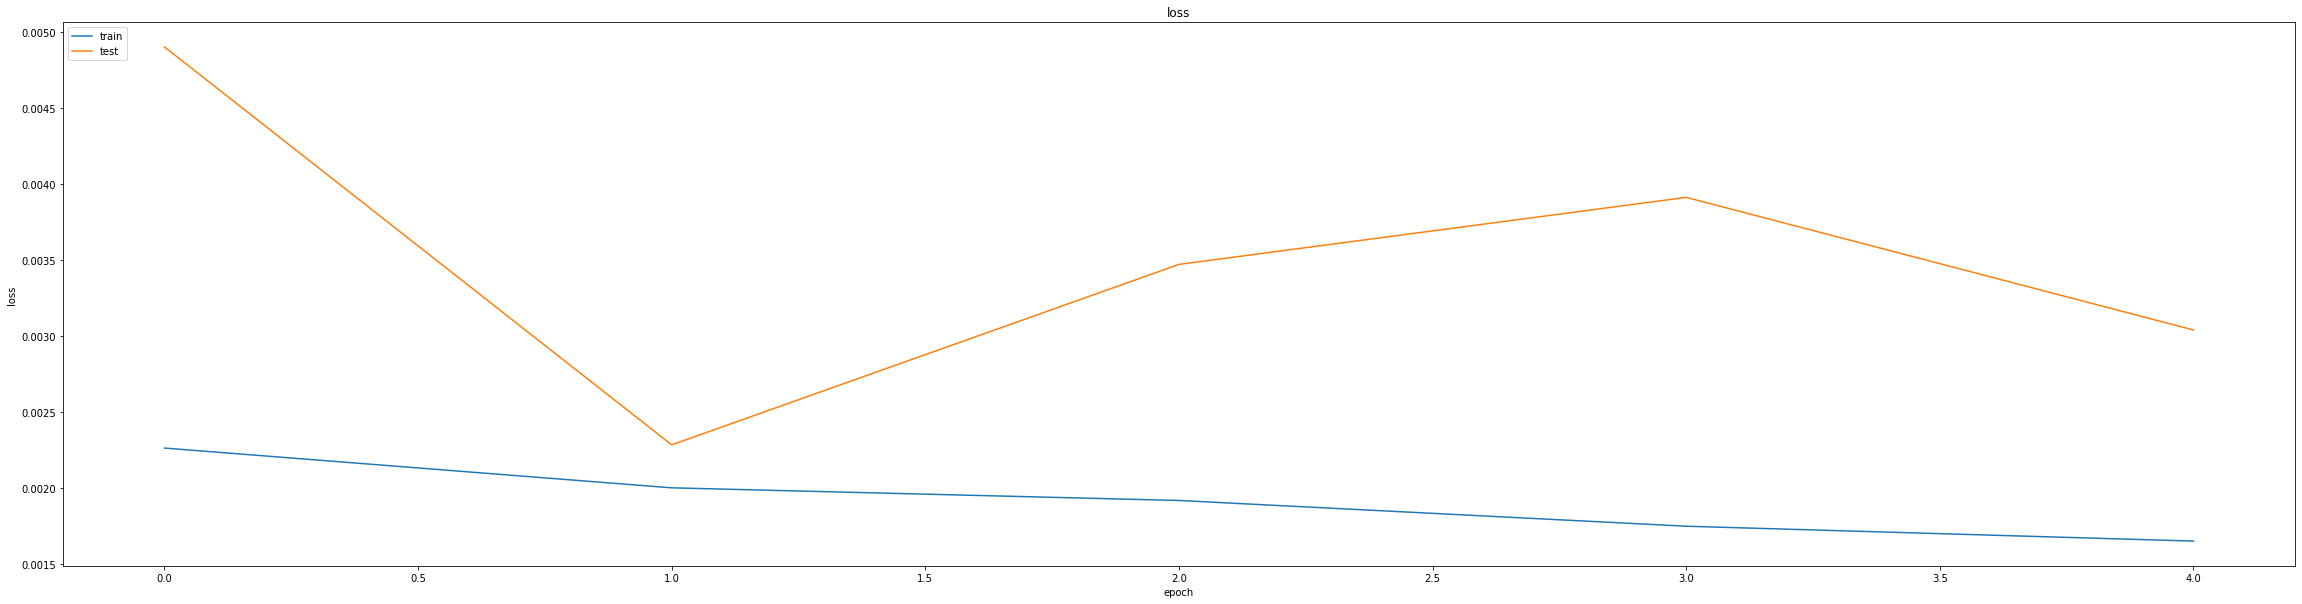

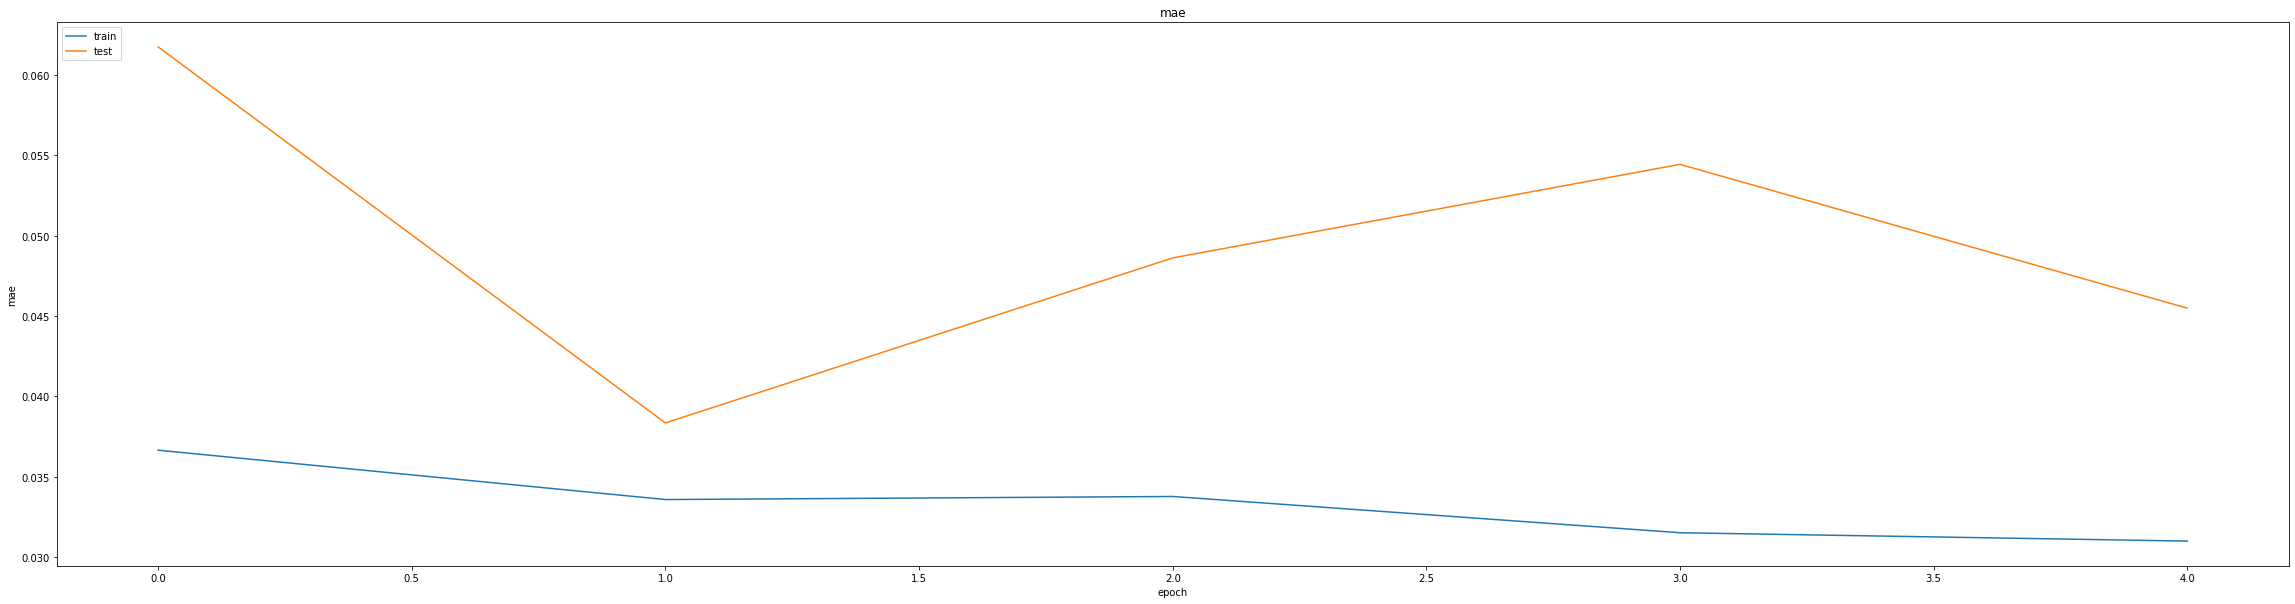

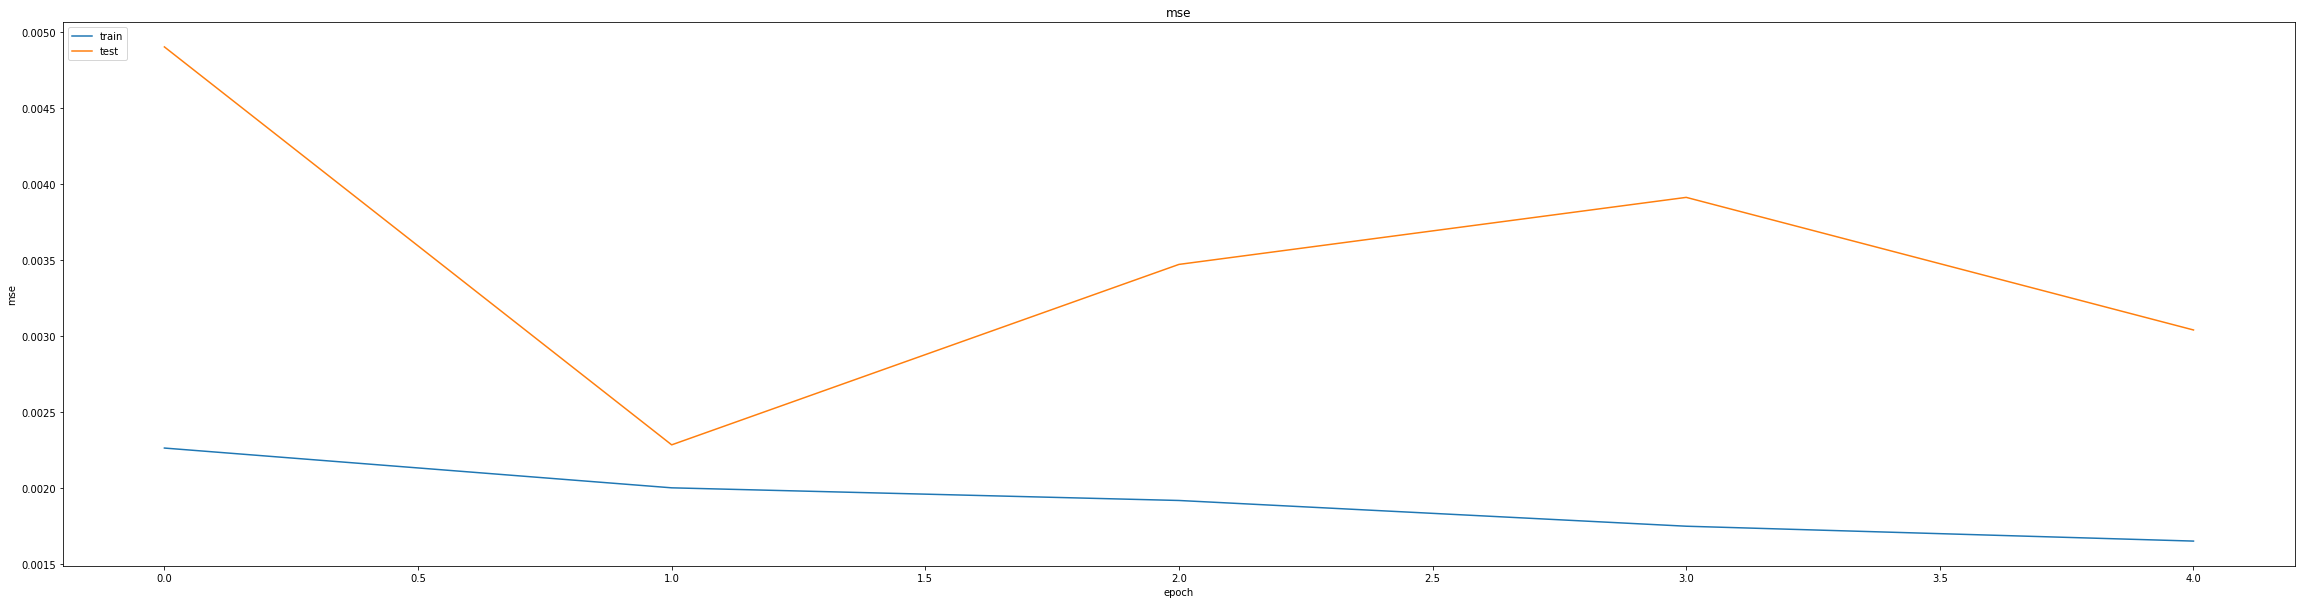

In [112]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [113]:
min(history.history['val_mse'])

0.0022848930675536394

In [114]:
# Baby the model a bit
# Load the weight that worked the best
model.load_weights(LeChemin+"TEST_BOOST/weights.best.hdf5")

# Train again with decaying learning rate
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay]
history = model.fit(trainX, trainY, epochs=int(epoch), batch_size=4, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Train on 832 samples, validate on 93 samples
Epoch 1/5
832/832 [==============================] - 5s 6ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - val_loss: 0.0030 - val_mae: 0.0446 - val_mse: 0.0030

Epoch 00001: val_mse did not improve from 0.00228
Epoch 2/5
832/832 [==============================] - 5s 6ms/step - loss: 0.0010 - mae: 0.0233 - mse: 0.0010 - val_loss: 0.0032 - val_mae: 0.0464 - val_mse: 0.0032

Epoch 00002: val_mse did not improve from 0.00228
Epoch 3/5
lr changed to 0.0009000000427477062
832/832 [==============================] - 5s 6ms/step - loss: 0.0011 - mae: 0.0240 - mse: 0.0011 - val_loss: 0.0030 - val_mae: 0.0454 - val_mse: 0.0030

Epoch 00003: val_mse did not improve from 0.00228
Epoch 4/5
832/832 [==============================] - 5s 6ms/step - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - val_loss: 0.0043 - val_mae: 0.0567 - val_mse: 0.0043

Epoch 00004: val_mse did not improve from 0.00228
Epoch 5/5
lr changed to 0.0008100000384729356
832/832 [========

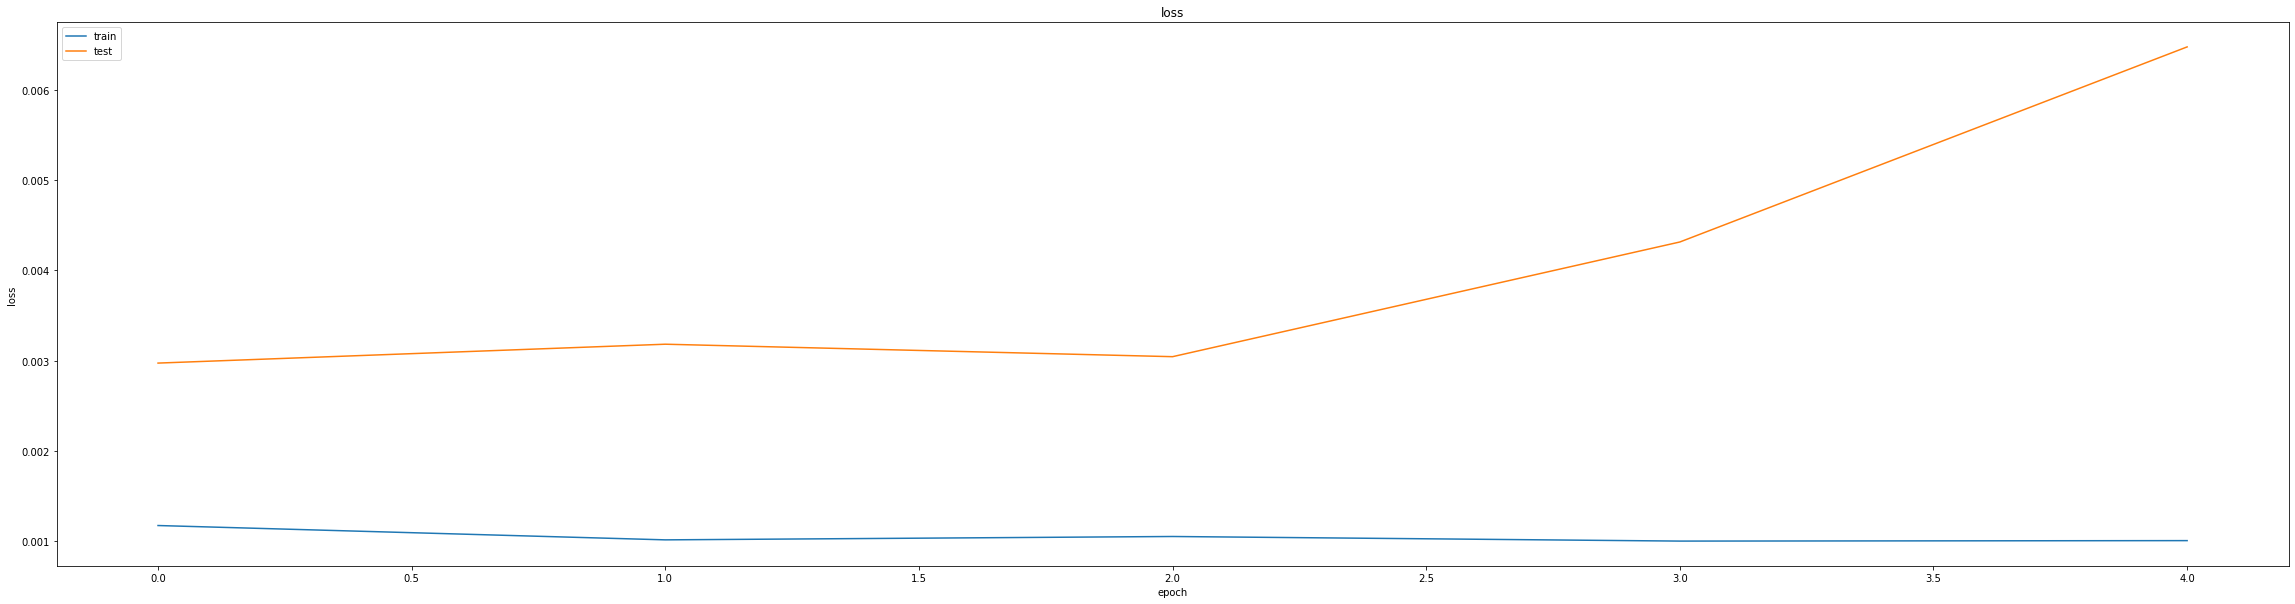

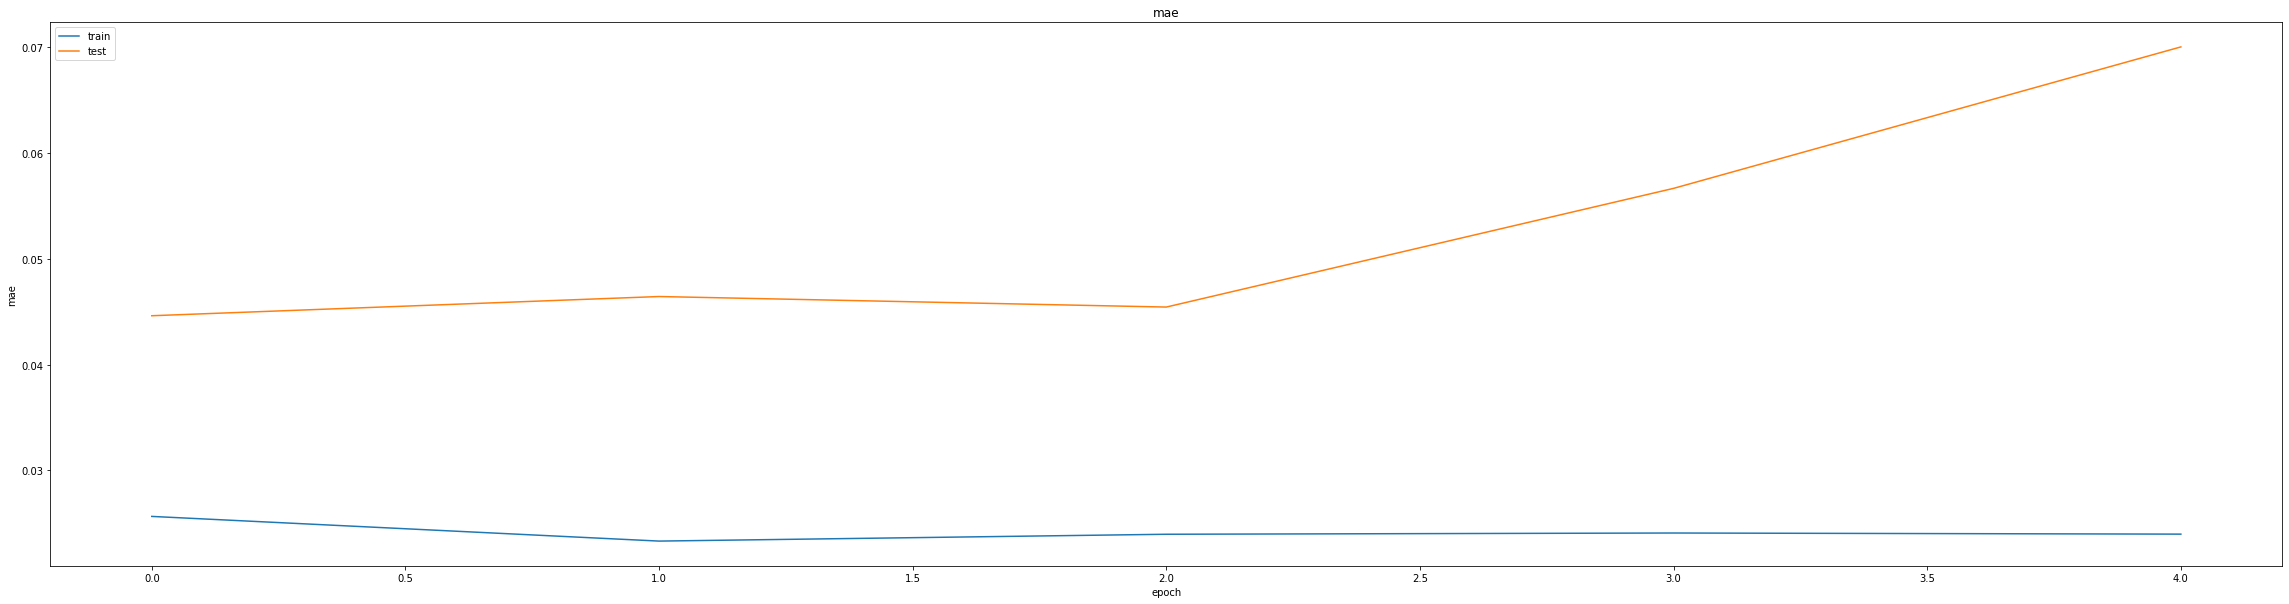

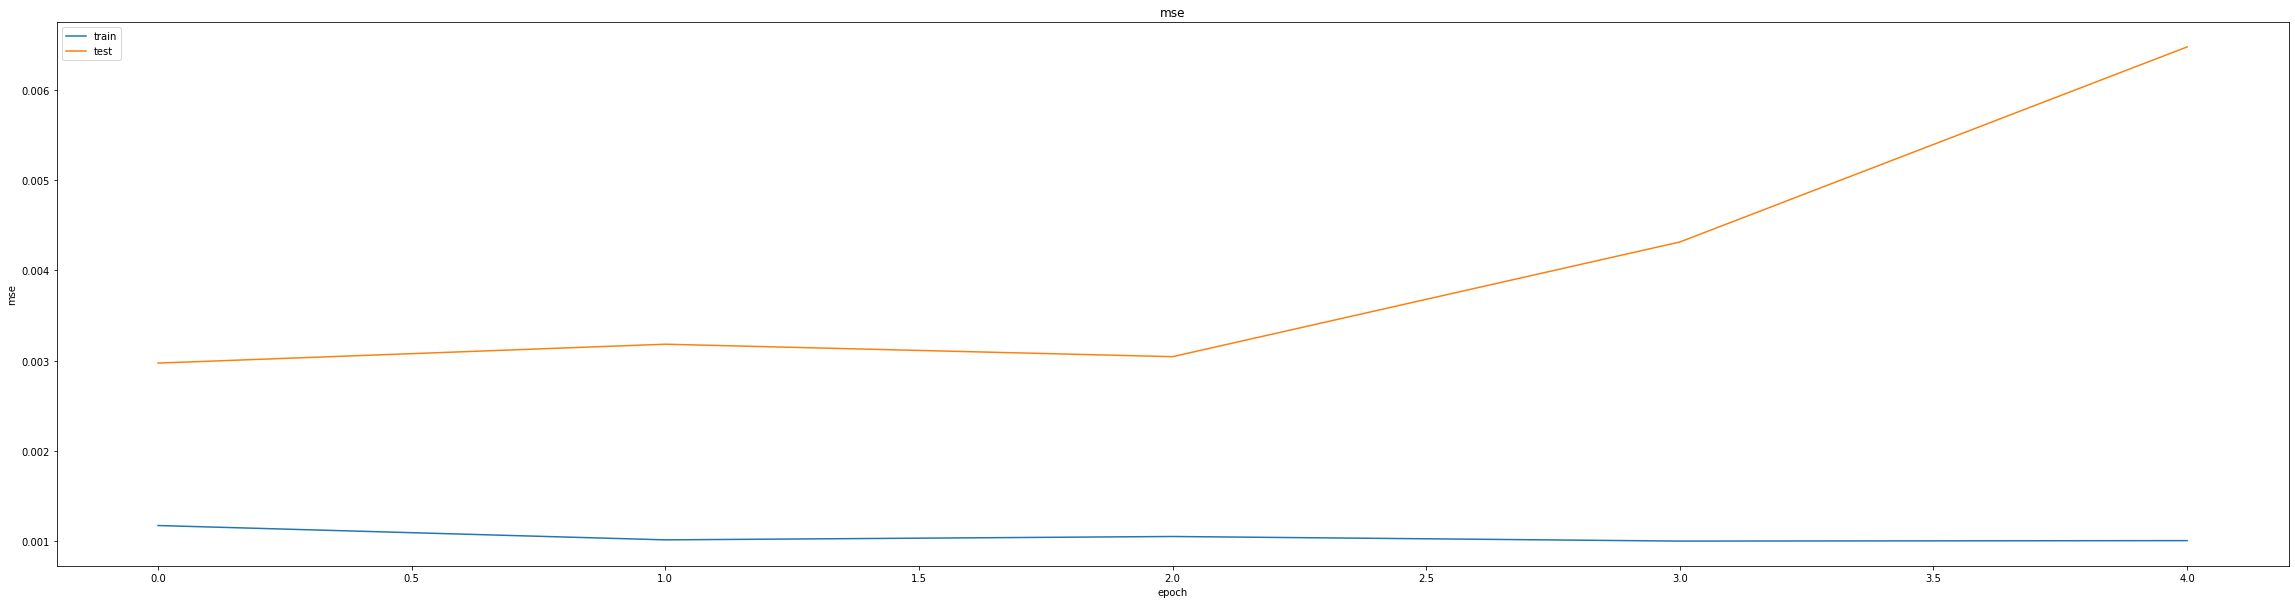

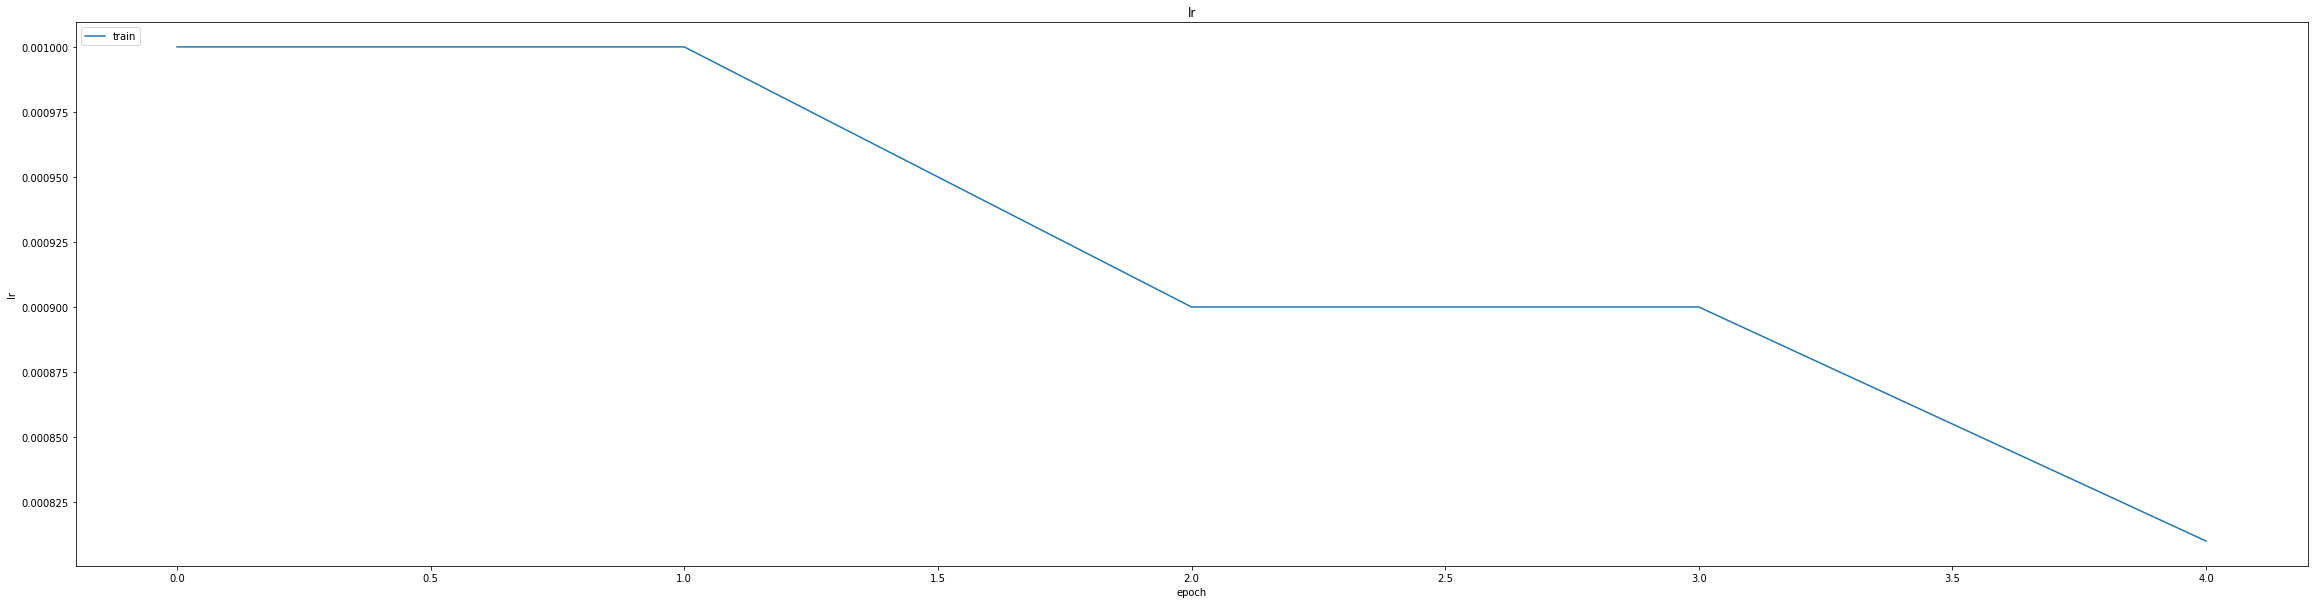

In [115]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        try:
            plt.plot(history.history['val_' + k])
        except:
            pass
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [116]:
min(history.history['val_mae'])

0.04461982101202011

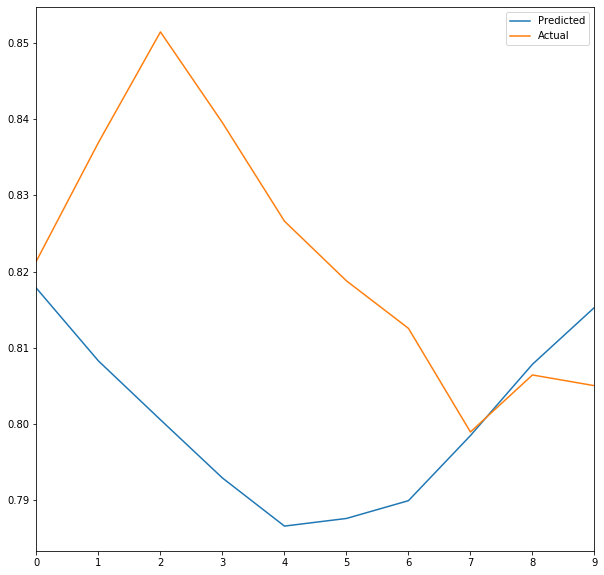

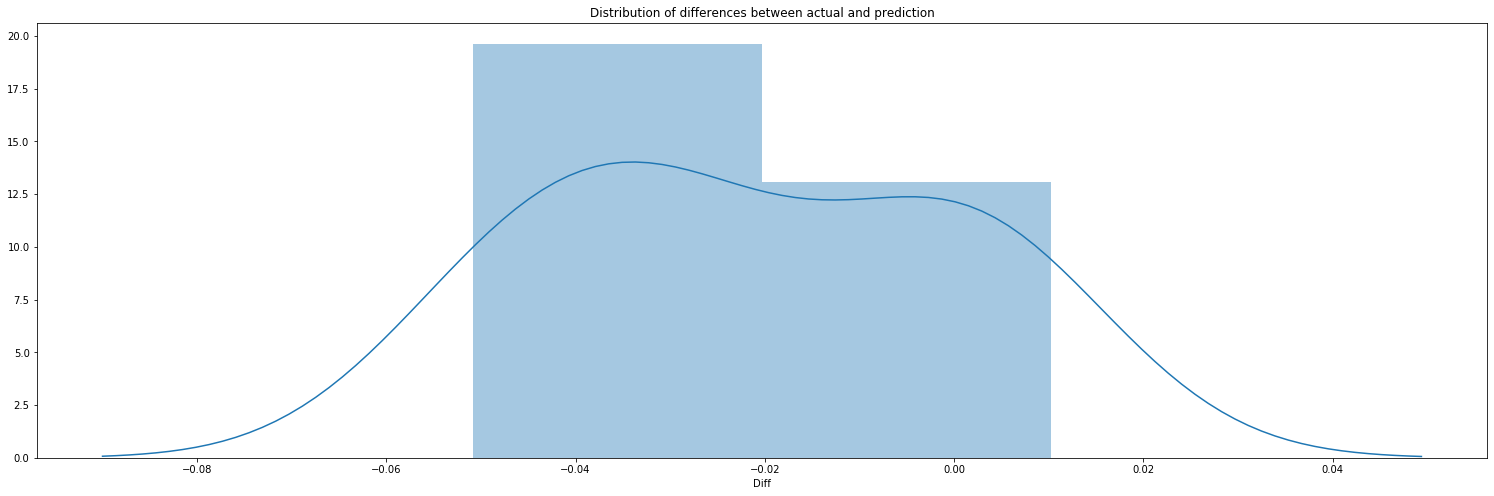

MSE :  0.0008777507534297513
MAE :  0.02355358600616455


count    10.000000
mean     -0.021222
std       0.021792
min      -0.050857
25%      -0.037779
50%      -0.025618
75%      -0.001249
max       0.010259
Name: Diff, dtype: float64

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Benchmark
model.load_weights(LeChemin+"TEST_BOOST/weights.best.hdf5")

pred = model.predict(testX)

predictions = pd.DataFrame()
predictions['Predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['Actual'] = testY
predictions = predictions.astype(float)

predictions.plot(figsize=(10,10))
plt.show()

predictions['Diff'] = predictions['Predicted'] - predictions['Actual']
plt.figure(figsize=(26,8))
sns.distplot(predictions['Diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

print("MSE : ", mean_squared_error(predictions['Predicted'].values, predictions['Actual'].values))
print("MAE : ", mean_absolute_error(predictions['Predicted'].values, predictions['Actual'].values))
predictions['Diff'].describe()

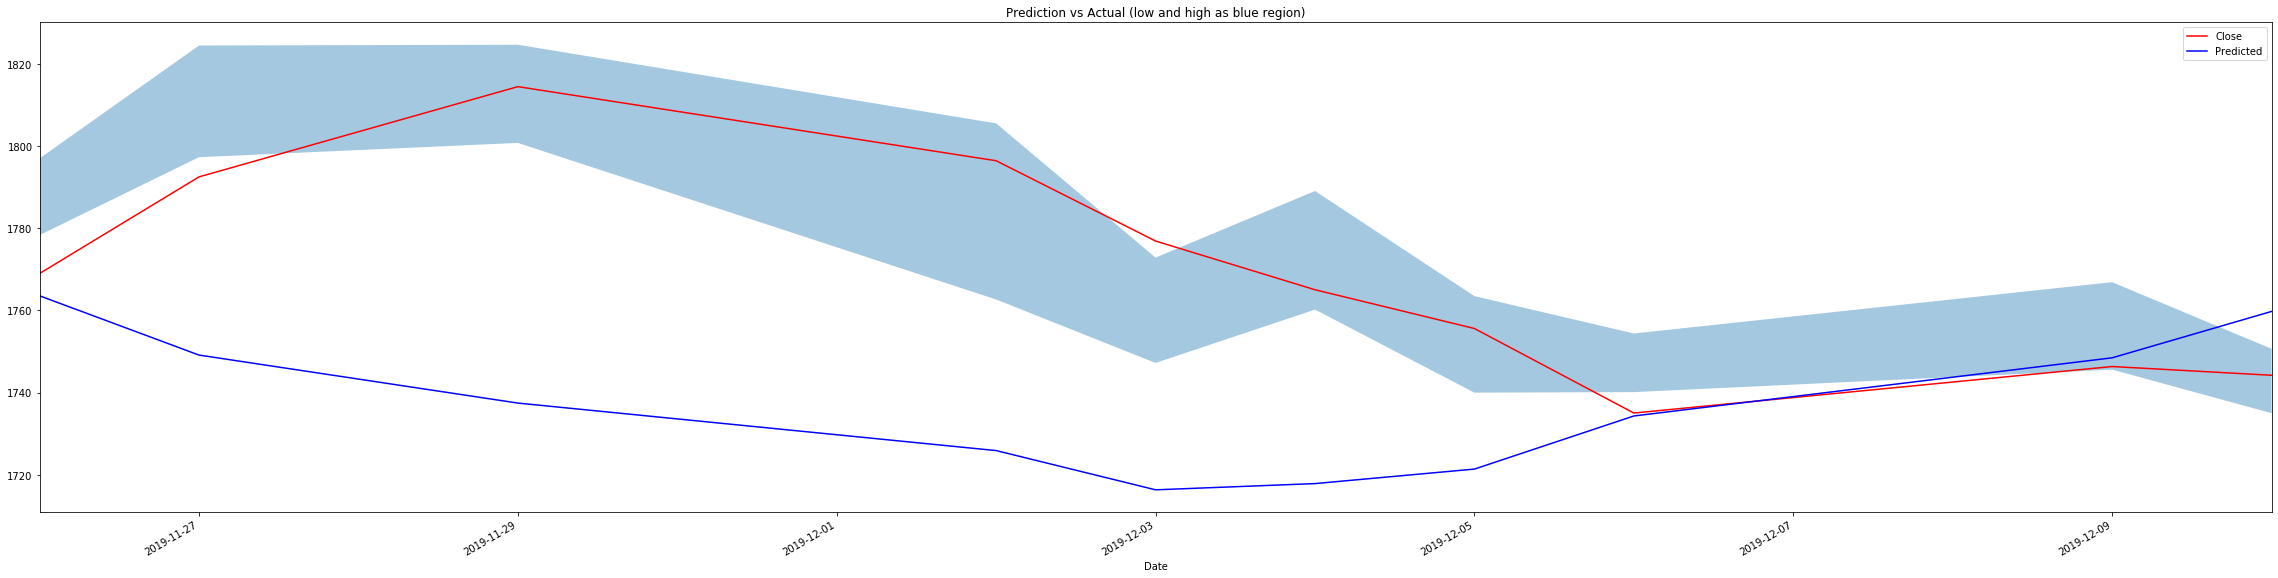

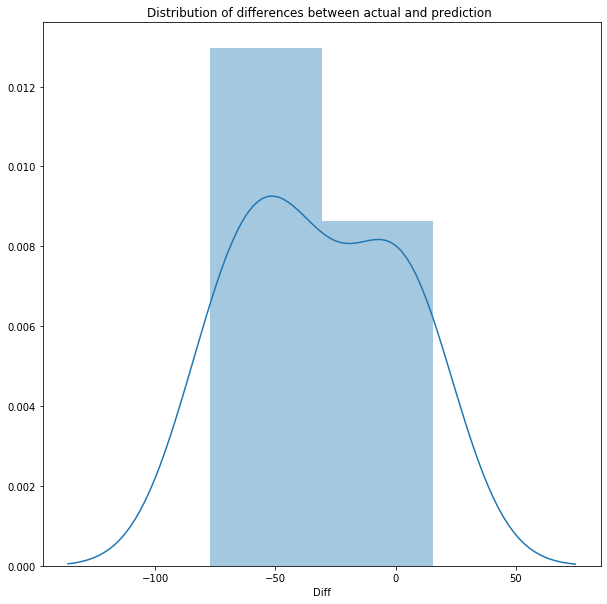

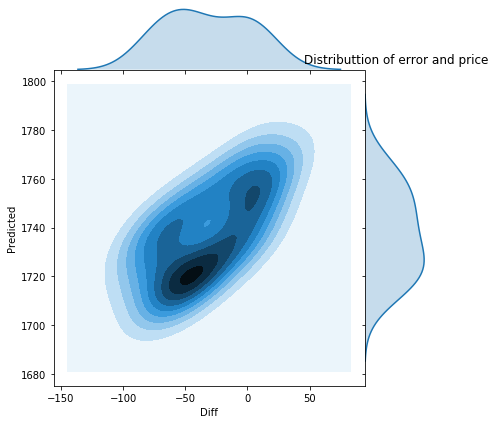

MSE :  2013.335261848569
MAE :  35.6721435546875


count    10.000000
mean    -32.140527
std      33.003733
min     -77.023682
25%     -57.216034
50%     -38.798462
75%      -1.891113
max      15.537598
Name: Diff, dtype: float64

In [121]:
pred = model.predict(testX)
pred = y_scaler.inverse_transform(pred)
close = y_scaler.inverse_transform(np.reshape(testY, (testY.shape[0], 1)))
predictions = pd.DataFrame()
predictions['Predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['Close'] = pd.Series(np.reshape(close, (close.shape[0])))

p = LaBase[LaBase['Symbol']=='AMZN'][['High','Low']][-pred.shape[0]:].copy()
predictions.index = p.index
predictions = predictions.astype(float)
predictions = predictions.merge(p[['Low', 'High']], right_index=True, left_index=True)

ax = predictions.plot(y='Close', c='red', figsize=(40,10))
ax = predictions.plot(y='Predicted', c='blue', figsize=(40,10), ax=ax)
index = [str(item) for item in predictions.index]
plt.fill_between(x=index, y1='Low', y2='High', data=p, alpha=0.4)
plt.title('Prediction vs Actual (low and high as blue region)')
plt.show()

predictions['Diff'] = predictions['Predicted'] - predictions['Close']
plt.figure(figsize=(10,10))
sns.distplot(predictions['Diff']);
plt.title('Distribution of differences between actual and prediction ')
plt.show()

g = sns.jointplot("Diff", "Predicted", data=predictions, kind="kde", space=0)
plt.title('Distributtion of error and price')
plt.show()

# predictions['correct'] = (predictions['predicted'] <= predictions['high']) & (predictions['predicted'] >= predictions['low'])
# sns.factorplot(data=predictions, x='correct', kind='count')

print("MSE : ", mean_squared_error(predictions['Predicted'].values, predictions['Close'].values))
print("MAE : ", mean_absolute_error(predictions['Predicted'].values, predictions['Close'].values))
predictions['Diff'].describe()

In [122]:
predictions

,Predicted,Close,Low,High,Diff
Date,,,,,
2019-11-26,1763.576416,1769.003296,1778.349976,1797.030029,-5.426880
2019-11-27,1749.146484,1792.523804,1797.310059,1824.500000,-43.377319
2019-11-29,1737.462891,1814.486572,1800.790039,1824.689941,-77.023682
2019-12-02,1725.898315,1796.454224,1762.680054,1805.550049,-70.555908
2019-12-03,1716.346313,1776.904663,1747.229980,1772.869995,-60.558350
2019-12-04,1717.863647,1765.052734,1760.219971,1789.089966,-47.189087
2019-12-05,1721.394287,1755.613892,1740.000000,1763.500000,-34.219604
2019-12-06,1734.323486,1735.036011,1740.130005,1754.400024,-0.712524
2019-12-09,1748.479004,1746.358521,1745.609985,1766.890015,2.120483


In [125]:
predictions['%'] = (predictions['Close'].shift(-5)-predictions['Predicted'])*100/predictions['Close'].shift(-5)

In [126]:
predictions

,Predicted,Close,Low,High,Diff,%
Date,,,,,,
2019-11-26,1763.576416,1769.003296,1778.349976,1797.030029,-5.426880,0.083642
2019-11-27,1749.146484,1792.523804,1797.310059,1824.500000,-43.377319,0.368384
2019-11-29,1737.462891,1814.486572,1800.790039,1824.689941,-77.023682,-0.139875
2019-12-02,1725.898315,1796.454224,1762.680054,1805.550049,-70.555908,1.171592
2019-12-03,1716.346313,1776.904663,1747.229980,1772.869995,-60.558350,1.598644
2019-12-04,1717.863647,1765.052734,1760.219971,1789.089966,-47.189087,NaN
2019-12-05,1721.394287,1755.613892,1740.000000,1763.500000,-34.219604,NaN
2019-12-06,1734.323486,1735.036011,1740.130005,1754.400024,-0.712524,NaN
2019-12-09,1748.479004,1746.358521,1745.609985,1766.890015,2.120483,NaN


In [144]:
model.predict(scaler.fit_transform(df.iloc[-1,:].reshape(1, -1)))  

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
LeChemin+"TEST_BOOST/weights_best.hdf5"